In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Being familiar with Python

In [ ]:
# Preparing the Fibonacci sequence
F=[0]
F.append(1)
for i in range(2,50):
  F.append(F[i-1]+F[i-2])

Text(0, 0.5, '$F_N$')

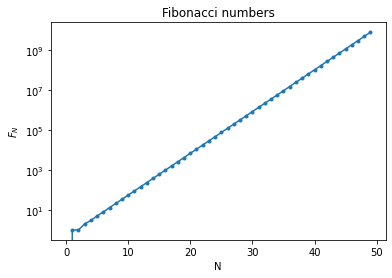

In [ ]:
plt.plot(F,'.-')
plt.yscale('log')
plt.title('Fibonacci numbers')
plt.xlabel('N')
plt.ylabel(r'$F_N$')

In [ ]:
print(F)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049]


In [ ]:
def func(x):
  N=0
  while F[N]<=x:
    N=N+1

  print("The largest Fibonacci number that is not larger than ",float(x) ," is ", float(F[N-1]), ", and it is the ", N-1, "-th element in the sequence.")

In [ ]:
func(17.5)

The largest Fibonacci number that is not larger than  17.5  is  13.0 , and it is the  7 -th element in the sequence.


In [ ]:
a=2
print(type(a))
print(a)

<class 'int'>
2


In [ ]:
b=2.
print(type(b))
print(b)

<class 'float'>
2.0


# 2. Math practice

(a)

The characteristic polynomial of A is
\begin{align*}
f(\lambda)=\begin{vmatrix}
2-\lambda & 1 & -1\\
-2 & 5-\lambda & -1\\
-2 & 1 & 3-\lambda\\
\end{vmatrix}
&=(2-\lambda)
\begin{vmatrix}
5-\lambda & -1 \\
1 & 3-\lambda
\end{vmatrix}
+2
\begin{vmatrix}
1 & -1 \\
1 & 3-\lambda
\end{vmatrix}
-2
\begin{vmatrix}
1 & -1 \\
5-\lambda & -1
\end{vmatrix}\\
&=(2-\lambda)(\lambda^2-8\lambda+16)+2(-\lambda+4)-2(-\lambda+4)\\
&=-(\lambda-2)(\lambda-4)^2
\end{align*}
Eigenvalues of A are $\lambda_1=2$, and $\lambda_2=\lambda_3=4$.



In [ ]:
A=[[2, 1, -1],[-2, 5, -1], [-2, 1, 3]]
A=np.matrix(A)
np.linalg.eig(A)[0]

array([2., 4., 4.])

$$A \text{ is positive definite} \Leftrightarrow\textbf{x}^TA\textbf{x}>0 \;\forall \textbf{x}\neq\textbf{0}$$

If $S$ is symmetric, we have
$$S=PDP^{-1},\text{ where }P^T=P^{-1}$$
$$\textbf{x}^TS\textbf{x}=\textbf{x}^TPDP^{T}\textbf{x}=\textbf{y}^TD\textbf{y}, \text{ where } y=P^Tx$$
$$\textbf{x}^TS\textbf{x}>0 \;\forall \textbf{x}\neq\textbf{0}\Leftrightarrow\textbf{y}^TD\textbf{y}>0 \;\forall \textbf{y}\neq\textbf{0}\Leftrightarrow D_{ii}>0\;\forall i$$

\begin{align}
A&=\frac{A+A^T}{2}+\frac{A-A^T}{2}\\
&=S+T
\end{align}
$S$ is symmetric, and T is anti-symmetric. i.e. $S^T=S$, and $T^T=-T$


$$\textbf{x}^TT\textbf{x}=(\textbf{x}^TT\textbf{x})^T=\textbf{x}^TT^T\textbf{x}=-\textbf{x}^TT\textbf{x}$$
$$\textbf{x}^TT\textbf{x}=0$$


$$\textbf{x}^TA\textbf{x}>0 \;\forall \textbf{x}\neq\textbf{0}\Leftrightarrow\textbf{x}^TS\textbf{x}>0 \;\forall \textbf{x}\neq\textbf{0}$$

In [ ]:
S=1/2*(A+A.T)
np.linalg.eig(S)[0]

array([0.87867966, 4.        , 5.12132034])

(b)

In [ ]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/multivariate-linear-regression/multivariate-linear-regression-example-3.csv", sep=",")
pd.set_option('display.width', 120)
print (df)

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 278 (delta 54), reused 2 (delta 2), pack-reused 153
Receiving objects: 100% (278/278), 7.79 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (142/142), done.
    systolic blood pressure  age in years  weight in pounds
0                       132            52               173
1                       143            59               184
2                       153            67               194
3                       162            73               211
4                       154            64               196
5                       168            74               220
6                       137            54               188
7                       149            61               188
8                       159            65               207
9                       128   

In [ ]:
X = df[['age in years','weight in pounds']] # This time, we only have 2 variables to fit to.
print(X)

    age in years  weight in pounds
0             52               173
1             59               184
2             67               194
3             73               211
4             64               196
5             74               220
6             54               188
7             61               188
8             65               207
9             46               167
10            72               217


In [ ]:
X=np.matrix(X)
x_b = np.c_[np.ones((len(X),1)),X]
M=np.shape(X)[0]
Q=1/M*x_b.T*x_b
print(Q)
np.linalg.eig(Q)[0]

[[1.00000000e+00 6.24545455e+01 1.95000000e+02]
 [6.24545455e+01 3.97609091e+03 1.23143636e+04]
 [1.95000000e+02 1.23143636e+04 3.82975455e+04]]


array([4.22596973e+04, 3.42365299e-03, 1.49355988e+01])

$$f(x_1,x_2,x_3)=x_1\ln(x_2^2+x_3)$$

$$\frac{\partial f}{\partial x_1}=\ln(x_2^2+x_3)$$

$$\frac{\partial f}{\partial x_2}=\frac{2x_1x_2}{x_2^2+x_3}$$

$$\frac{\partial f}{\partial x_3}=\frac{2x_1}{x_2^2+x_3}$$

$$H_f=
f(\lambda)=\begin{pmatrix}
0 & \frac{2x_2}{x_2^2+x_3} & \frac{2}{x_2^2+x_3}\\
\frac{2x_1x_2}{x_2^2+x_3} & \frac{2x_1(x_2^2+x_3)-4x_1x_2^2}{(x_2^2+x_3)^2} & \frac{-2x_1x_2}{(x_2^2+x_3)^2}\\
\frac{2}{x_2^2+x_3} & \frac{-2x_1x_2}{(x_2^2+x_3)^2} & \frac{-2x_1}{(x_2^2+x_3)^2}\\
\end{pmatrix}
$$

# 3. Gradient descent method and steepest descent method

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import itertools
%matplotlib inline
#%matplotlib notebook

In [ ]:
A = np.matrix([[3.,-2.],[-2.,5.]])
b = np.matrix([[-1.],[8.]])
c = 2.

In [ ]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.gca(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

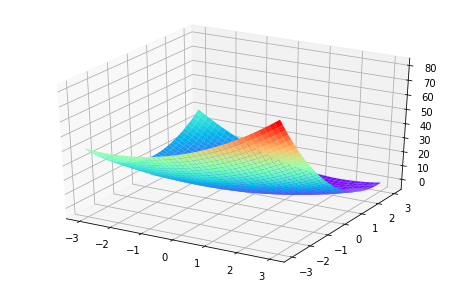

In [ ]:
x1,x2,zs = paraboloid(A,b,c)

In [ ]:
def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8))
    levels = range(-10,10)
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

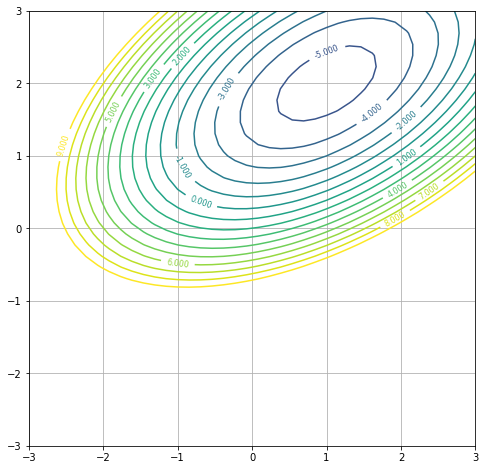

In [ ]:
contoursteps(x1,x2,zs)

In [ ]:
x = np.matrix([[0.],[0.]])
steps = [(0.,0.)]
i = 0
imax = 1000
eps = 0.001
alpha = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
J_GD=[]
J_GD.append(np.sqrt(float(delta)))
while i< imax and delta > eps**2 * delta0:
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    J_GD.append(np.sqrt(float(delta)))
    i +=1

Local mininum occurs at: [[0.99611987]
 [1.99760194]]
Number of iterations: 339


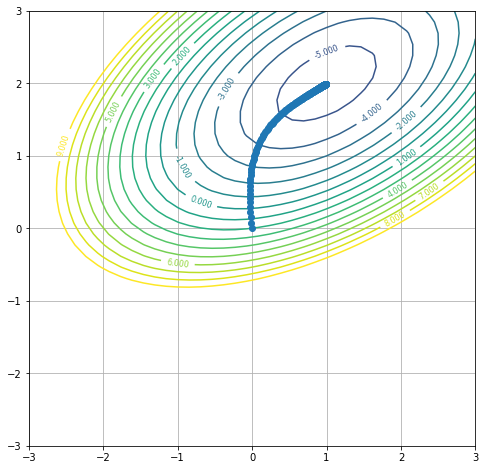

In [ ]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

In [ ]:
x = np.matrix([[0.],[0.]])
steps = [(0.,0.)]
i = 0
imax = 1000
eps = 0.001
r = b - A * x
r_old=r
delta = r.T * r
delta0 = delta
J_SD=[]
J_SD.append(np.sqrt(float(delta)))
while i< imax and delta > eps**2 * delta0:
    alpha = float(delta/float(r.T * (A * r)))
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    print(float(r_old.T * r))
    r_old=r
    delta = r.T * r
    J_SD.append(np.sqrt(float(delta)))
    i +=1

-3.552713678800501e-15
-2.220446049250313e-16
-9.020562075079397e-16
1.3183898417423734e-16
-5.733261088103347e-16
3.133344278483108e-17
-6.001059024707267e-17
2.425902360936316e-18
-3.4050724479622874e-19


We can see that the dot product of any two consecutive search directions is 0, except for some insignificant floating-point error.

Local mininum occurs at: [[0.99784567]
 [1.99902542]]
Number of iterations: 9


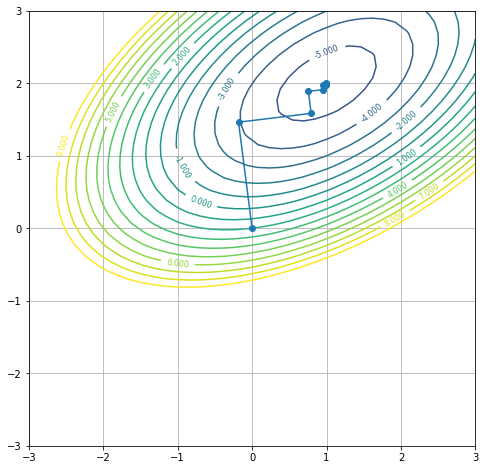

In [ ]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

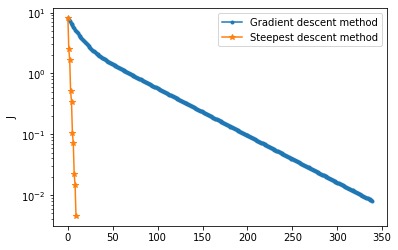

In [ ]:
plt.plot(J_GD,'.-',label='Gradient descent method')
plt.plot(J_SD,'*-',label='Steepest descent method')
plt.yscale('log')
plt.ylabel('J')
plt.legend()

The number of iterations needed for x to converge to the solution in steepest descent method is much less than that in gradient descent method. Also, as shown in the above plot, the modulus of residual $J=||\textbf{r}||$ decays much faster in the case of steepest descent method.

We can therefore conclude that steepest descent method is faster comparing to gradient descent methon.